<a href="https://colab.research.google.com/github/FernandoGuillen-lab/DataScience/blob/main/Visualizaci%C3%B3n_con_machine_learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick import ClassBalance
from yellowbrick.classifier import ConfusionMatrix, ClassPredictionError, ClassificationReport, PrecisionRecallCurve, ROCAUC

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [ ]:
hot= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/0.f4u5yrlx870.hy81g7kselnhotels.csv")

hot


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
hot.shape

(119390, 32)

In [ ]:
hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Análisis exploratorio de datos

In [ ]:
hot.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#Se eliminan las columnas agent, company y country, debido a que estas presentas una gran cantidad de datos faltantes.
#Por otro lado children se mantiene y se cambian los valores faltantes por 0

hot["children"].fillna(0, inplace=True)

hot.drop(["agent","company","country"], axis=1, inplace=True)


hot.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [ ]:

vard= hot["is_canceled"]. value_counts().reset_index()

vard.columns= ["is_canceled", "cant"]

vard.set_index("is_canceled", inplace=True)

vard

,cant
is_canceled,
0,75166
1,44224


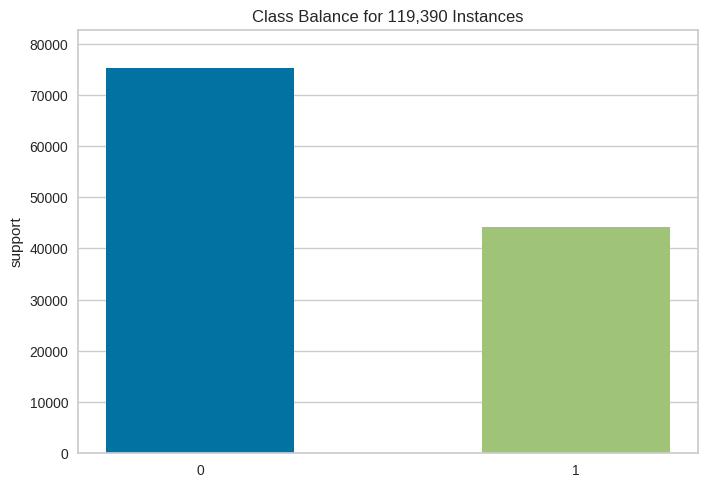

In [ ]:
vis= ClassBalance(labels= ["0","1"])

vis.fit(hot["is_canceled"])

vis.show(outphat="fig/profundiza/01_class_balance.png");

In [ ]:
#Se puede intuir que en los resultados de 0 serian los que no cancelaron la reserva, mientras mientras que del resultado de 1, son los que si cancelaron.
#Se muestra un problema de clasificacion binaria con clases desbalanceadas

In [ ]:
def var_num (df):

  month_arrival={ "January":1, "February":2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8, "September":9, "October":10, "November":11, "December":12 }

  #res_roomtype= {"A":0, "B":1, "C":2, "D":3, "E":4, "F":5, "G":6, "H":7, "L":8, "P":9 }

  ass_roomtype= {"A":0, "B":1, "C":2, "D":3, "E":4, "F":5, "G":6, "H":7, "I":8, "K":9, "L":10, "P":11 }

  #df["reservation_status_date"]= pd.to_datetime(df["reservation_status_date"])

  #df_datetime= pd.DataFrame({

    #"year_resrvation_status": df["reservation_status_date"].dt.year,
    #"month_resrvation_status": df["reservation_status_date"].dt.month,
    #"day_resrvation_status": df["reservation_status_date"].dt.day
    #})

  df["arrival_date_month"]= df["arrival_date_month"].replace(month_arrival)
  df["assigned_room_type"]= df["assigned_room_type"].replace(ass_roomtype)
  #df["reserved_room_type"]= df["reserved_room_type"].replace(res_roomtype)

  df_numeric = df[[ "lead_time",  "arrival_date_month",  "stays_in_weekend_nights", "adults", "children", "babies", "is_repeated_guest", "previous_cancellations", "previous_bookings_not_canceled", "booking_changes", "days_in_waiting_list", "adr", "required_car_parking_spaces", "total_of_special_requests",  "assigned_room_type", ]]

#"arrival_date_year", "arrival_date_week_number", "arrival_date_day_of_month",   "reserved_room_type",

  return pd.concat([df_numeric], axis=1)


def cat_var (df):

  df_hotel= pd.get_dummies(df[["hotel"]], drop_first=True)
  df_distribution_channel= pd.get_dummies(df[["distribution_channel"]], drop_first=True)
  df_deposit_type= pd.get_dummies(df.deposit_type.replace({"No Deposit":"No_refund", "Refundable":"Refundable", "Non Refund":"No_refund"}), prefix="deposit_type", drop_first=True)

  df_meal= pd.get_dummies(df.meal.replace ({"FB":"B", "HB":"B", "BB":"No_Breakfast", "SC":"No_Breakfast", "Undefined":"Undefined"}), prefix= "meal", drop_first=True)
  df_market_segment= pd.get_dummies(df.market_segment.replace({"Direct":"Direct", "Corporate":"Corporate", "Online TA":"Online", "Offline TA/TO":"Online",
                                                               "Complementary":"Other", "Groups":"Groups", "Undefined":"Other", "Aviation":"Aviation"}), prefix= "market_segment", drop_first=True)
  df_customer_type= pd.get_dummies(df.customer_type.replace({"Transient":"Transient", "Contract":"Contr/Group", "Transient-Party":"Transient", "Group":"Contr/Group"}), prefix= "customer_type", drop_first=True)


  #df_reservation_status= pd.get_dummies(df.reservation_status.replace({"Check-Out":"Check-Out", "Canceled":"No_checkout", "No-Show":"No_checkout"}),prefix="reservation_status", drop_first=True), df_reservation_status


  return pd.concat([df_hotel, df_meal,  df_market_segment, df_distribution_channel, df_deposit_type, df_customer_type ], axis=1)

def preprocesar_atributos (df):

  df_num= var_num(df)
  df_cat= cat_var(df)

  return pd.concat([df_num,df_cat], axis=1)

def var_ind (df):

  df_var_ind= df["is_canceled"]

  return df_var_ind




In [ ]:
preprocesar_atributos(hot).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       119390 non-null  int64  
 1   arrival_date_month              119390 non-null  int64  
 2   stays_in_weekend_nights         119390 non-null  int64  
 3   adults                          119390 non-null  int64  
 4   children                        119390 non-null  float64
 5   babies                          119390 non-null  int64  
 6   is_repeated_guest               119390 non-null  int64  
 7   previous_cancellations          119390 non-null  int64  
 8   previous_bookings_not_canceled  119390 non-null  int64  
 9   booking_changes                 119390 non-null  int64  
 10  days_in_waiting_list            119390 non-null  int64  
 11  adr                             119390 non-null  float64
 12  required_car_par

In [ ]:
X= preprocesar_atributos(hot)
Y= var_ind(hot)

x_train, x_test, y_train , y_test = train_test_split(X,Y, stratify= Y, test_size=.2, random_state=42)


In [ ]:
x_train.shape, x_test.shape,  y_train.shape, y_test.shape

((95512, 29), (23878, 29), (95512,), (23878,))

In [ ]:
y_train.value_counts(normalize= True)

0    0.629586
1    0.370414
Name: is_canceled, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

0    0.629575
1    0.370425
Name: is_canceled, dtype: float64

MODELO BASE


In [ ]:
clf_dt= DecisionTreeClassifier( min_samples_leaf= 20, class_weight= "balanced", random_state= 42)

clf_dt.fit(x_train, y_train)

y_pred= clf_dt.predict(x_test)

print(f"Error de clasificación F1:{np.round(f1_score(y_test, y_pred),2)}")

Error de clasificación F1:0.74


In [ ]:
clf_dt= DecisionTreeClassifier(max_depth= 5, class_weight= "balanced", random_state= 42)

params = {
    'max_depth':[5, 10, 50, 100, 150, 200],
    'min_samples_split':[2, 4, 6, 8],
    'min_samples_leaf':[1, 2, 4, 5]
}

grid_search= GridSearchCV( clf_dt, scoring= "roc_auc", param_grid= params, cv= 10, return_train_score= True, n_jobs= -1)

grid_search.fit(x_test, y_test)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 50, 100, 150, 200],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 4, 6, 8]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
def resumen_grid (df):

  best_params= grid_search.best_params_

  print("\n Se evaluaron {} modelos utilizando el grid search.".format(pd.DataFrame(grid_search.cv_results_).shape[0]))
  print("\n Los hiperparametros del mejor modelo son:" + str(best_params) + "\n")

In [ ]:
resumen_grid(grid_search)


 Se evaluaron 96 modelos utilizando el grid search.

 Los hiperparametros del mejor modelo son:{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}



In [ ]:
best_model= grid_search.best_estimator_

In [ ]:
y_pred= best_model.predict(x_test)

y_pred[:20]

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1])

In [ ]:
y_pred_proba= best_model.predict_proba(x_test)[:,1]

y_pred_proba[:20]

array([0.53119203, 0.19397216, 0.79566461, 0.05854056, 0.        ,
       0.58057453, 0.79566461, 0.8335599 , 0.36164838, 0.        ,
       0.28924143, 0.39555097, 0.8335599 , 0.49111038, 0.34154662,
       0.63217728, 0.42192903, 0.58782711, 0.14075859, 0.58782711])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


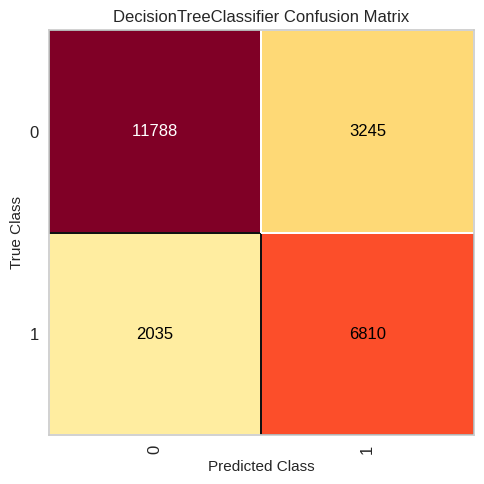

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
fig, ax = plt.subplots(figsize= (5,5))

cm= ConfusionMatrix( best_model, classes= ["0", "1"])

cm.fit(x_train, y_train)

cm.score(x_test, y_test)

cm.show()



*   Verdaderos Negativos: 11788
*   Falsos Positivos: 3245
*   Falsos Negativos: 2035
*   Verdaderos Positivos: 6810


Se puede observar que fueron un poco sifgnificativos los datos que no lograron identificarese correctamente para ambos casos, ya sea si cancelaron o no cancelaron. Por otro lado, se observa que la gran mayoría de los datos sí lograron identificarse correctamente para para la clase "0", pero para la clase "1", fue un poco bajo. Por lo tanto, se puede decir que el modelo base tiene un rendimiento aceptable para identificar ambas clases, a pesar de la cantidad de errores que se observan.




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


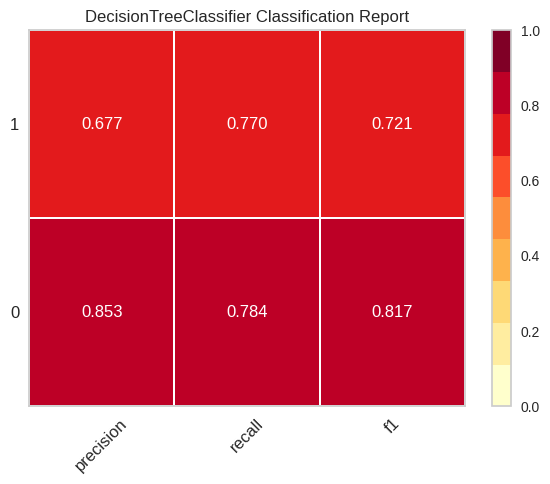

<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [ ]:
fig, ax = plt.subplots( figsize= (6,5))

visualizer= ClassificationReport( best_model, clases= ["0", "1"])

visualizer.fit(x_train, y_train)

visualizer.score(x_test, y_test)

visualizer.show()

  De acuerdo a los resultados del reporte de clasificación, el modelo base muestra un buen rendimiento que puede funcionar correctamente para ambas clases, sin embargo, la clase "0" es la que tiene mejores resultados, por lo que se esperaria que en el segundo modelo se mejor. A pesar de esto, el modelo es bueno para predecir la cancelacion de las reservas.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


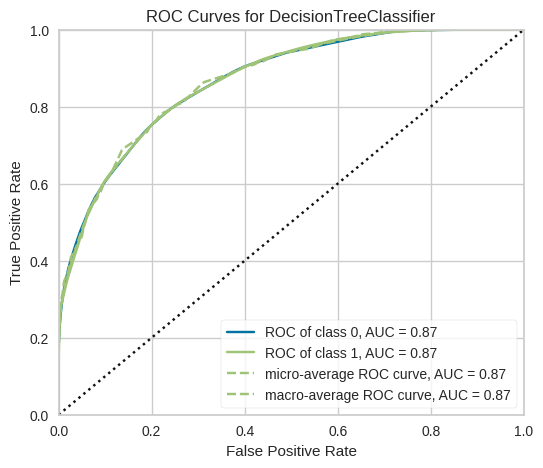

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
fig, ax = plt.subplots( figsize= (6,5))

roc_curve_visualizer= ROCAUC( best_model, clases= ["0", "1"])

roc_curve_visualizer.fit(x_train, y_train)

roc_curve_visualizer.score(x_test, y_test)

roc_curve_visualizer.show()

Los resultados muestran que el modelo base tiene una capacidad buena para predecir la cancelacion de reservaciones hoteleras. Esto le permitiría al negocio anticipar y gestionarlas cancelaciones, por lo que puede mejorar en la planificacion y rentabilidad.

In [ ]:
def graf_mc (model, x_val_test, y_val_test):

  fig, ax = plt.subplots( figsize= (5,5))

  cm= ConfusionMatrix( model,  clases= ["0", "1"])

  cm.fit(x_train, y_train)

  cm.score(x_val_test, y_val_test)

  cm.show()

def graf_rc (model, x_val_test, y_val_test):

  fig, ax = plt.subplots( figsize= (6,5))

  rc= ClassificationReport( model,  clases= ["0", "1"])

  rc.fit(x_train, y_train)

  rc.score(x_val_test, y_val_test)

  rc.show()


def graf_cr (model, x_val_test, y_val_test):

  fig, ax = plt.subplots( figsize= (6,6))

  cr= ROCAUC( model, clases= ["0", "1"] )

  cr.fit(x_train, y_train)

  cr.score(x_test, y_test)

  cr.show()





Random Forest



In [ ]:
clf_rf= RandomForestClassifier( random_state= 42, class_weight= "balanced")

clf_rf.fit(x_train, y_train)

y_pred_rand_for= clf_rf.predict(x_test)

print(f"Error de clasificación F1:{np.round(f1_score(y_test, y_pred_rand_for),2)}")

Error de clasificación F1:0.79


In [ ]:
clf_rf= RandomForestClassifier( random_state= 42, class_weight= "balanced")

params = { "n_estimators": [200],
    "max_depth": [50] ,
    "min_samples_split":[8],
    "min_samples_leaf":[2]
}

grid_s= GridSearchCV( clf_rf, params, scoring= "roc_auc", cv= 10, return_train_score= True, n_jobs= -1)

grid_s.fit(x_test, y_test)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [50], 'min_samples_leaf': [2],
                         'min_samples_split': [8], 'n_estimators': [200]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
resumen_grid(grid_s)


 Se evaluaron 96 modelos utilizando el grid search.

 Los hiperparametros del mejor modelo son:{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}



In [ ]:
best_model_rf= grid_s.best_estimator_

In [ ]:
y_pred_rf= best_model_rf.predict(x_test)

y_pred_rf[:20]

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1])

In [ ]:
y_pred_proba_rf= best_model_rf.predict_proba(x_test)[:,1]

y_pred_proba_rf[:20]

array([0.25237378, 0.28969304, 0.87169981, 0.11586063, 0.03657732,
       0.90726971, 0.91995893, 0.65689841, 0.12529507, 0.29350698,
       0.47964702, 0.30512901, 0.62965079, 0.53763813, 0.65529922,
       0.32193898, 0.3418646 , 0.70706434, 0.26456003, 0.93130601])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


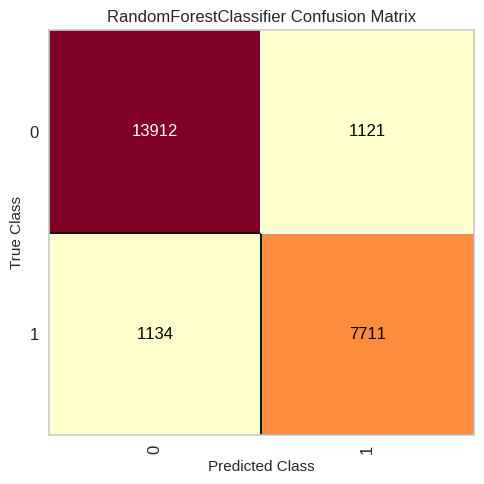

In [ ]:
graf_mc(best_model_rf, x_test, y_test)


*   Verdaderos Negativos: 13912
*   Falsos Positivos: 1121
*   Falsos Negativos: 1134
*   Verdaderos Positivos: 7711


Con el nuevo modelo, se observa que se tienen diferentes resultados con respecto a los datos que no fueron identificados correctamente y los que sí lo fueron. Sin embargo, se puede notar algo diferente en este modelo, ya que aumentaron los verdaderos negativos y los verdaderos positivos, y para los datos que no fueron identificados correctamente disminuyeron significativamente, con respecto al modelo anterior. Por lo tanto, se puede  concluir que el resultado tiene un mejor rendimiento, que el modelo base y es adecuado para darle uso a las predicciones de cancelación.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


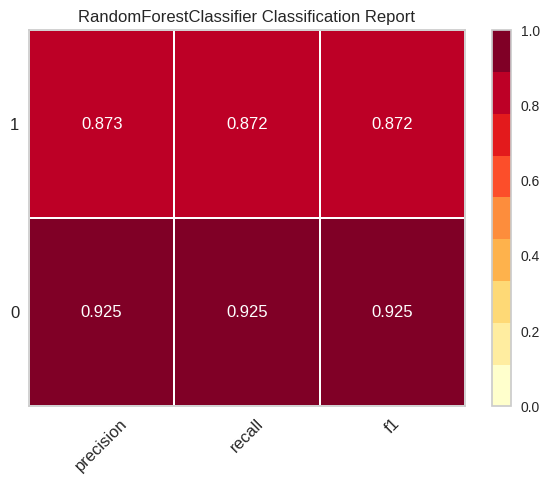

In [ ]:
graf_rc (best_model_rf, x_test, y_test)

Los resultados con este nuevo modelo, muestran un cambio significativo para ambas clases en los tres apartados precisión, recall y f1, aunque para la clase "1" el valos de los resultados es menor que los de la clase "0", estos resultados son mucho mejores que el modelo base, esto muestra una mejora para identificar a aquellas personas que cancelan su reservación y las que no lo hacen. Por lo que, este nuevo modelo le da al negocio una mejoría para la toma de decisiones respecto a los que cancelan y los que no, en comparacion del modelo base.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


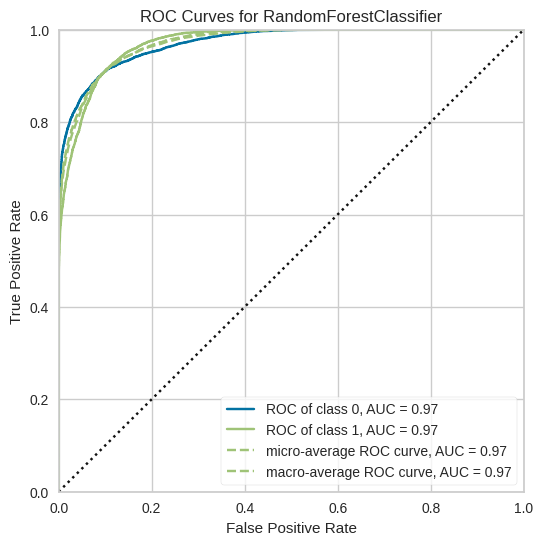

In [ ]:
graf_cr (best_model_rf, x_test, y_test)

Con el nuevo modelo, se obtiene un resultado casi perfecto que le ayudaría por mucho al negocio para una mejor gestion respecto a las cancelaciones, en comparacion del modelo base que esta por debajo de este nuevo modelo.


In [ ]:
df1=preprocesar_atributos(hot)
df1["Reservation ID"]=df1.index

test_ind= x_test.index

df_df= pd.DataFrame({"Reservation ID": test_ind})
df_df= df_df.sort_values(by="Reservation ID")

res= pd.DataFrame({"Reservation ID": df_df["Reservation ID"],
                   "Cancelation_Prob": y_pred_proba_rf,
                   "Cancelation_Classification": y_pred_rf})

res.to_csv("Reservation_predictions.csv", index=False)

Con estos resultados, el negocio puede obtener beneficios, como la identificación de cancelaciones, optimización de recursos y mejora de la experiencia del cliente. Lo que ayudaria a reducir perdidas por cancelación y aumentar la rentabilidad de la cadena hotelera.